In [1]:
#Install and import required packages:

!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle

In [2]:
#Load your database:
df = pd.read_csv('/content/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [11]:
# Drop Unwanted columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

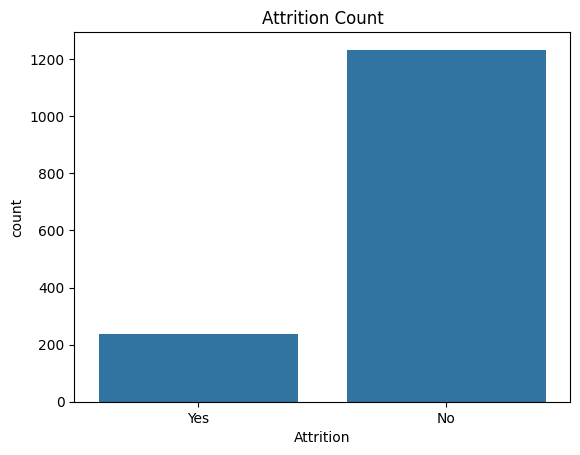

In [12]:
# EDA - visualize attrition counts
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()



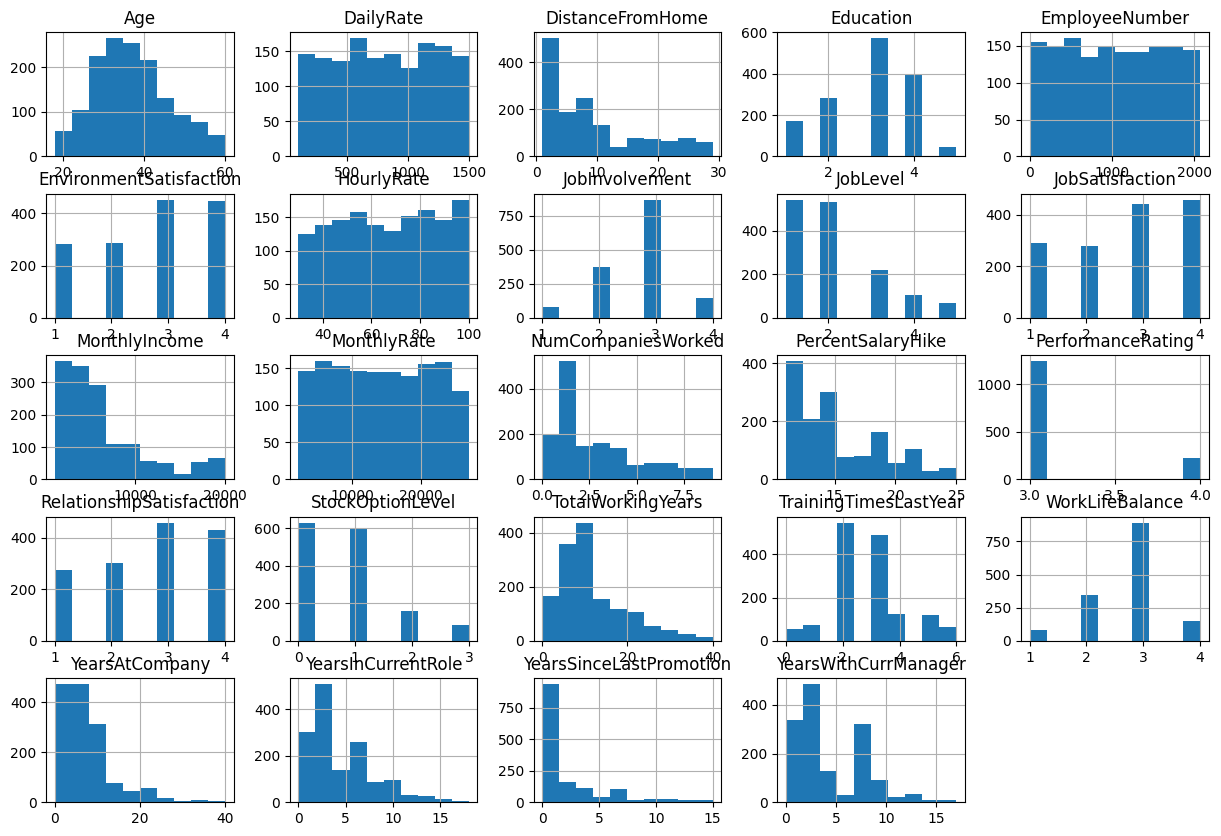

In [13]:
# Check distribution for numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10))
plt.show()


In [14]:
#Encode categorical features

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               4               4                        4  ...   
3          4               1               5                        4  ...   
4          1               3               7                        1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLev

In [15]:
# One-hot encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               4               4                        4  ...   
3          4               1               5                        4  ...   
4          1               3               7                        1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLev

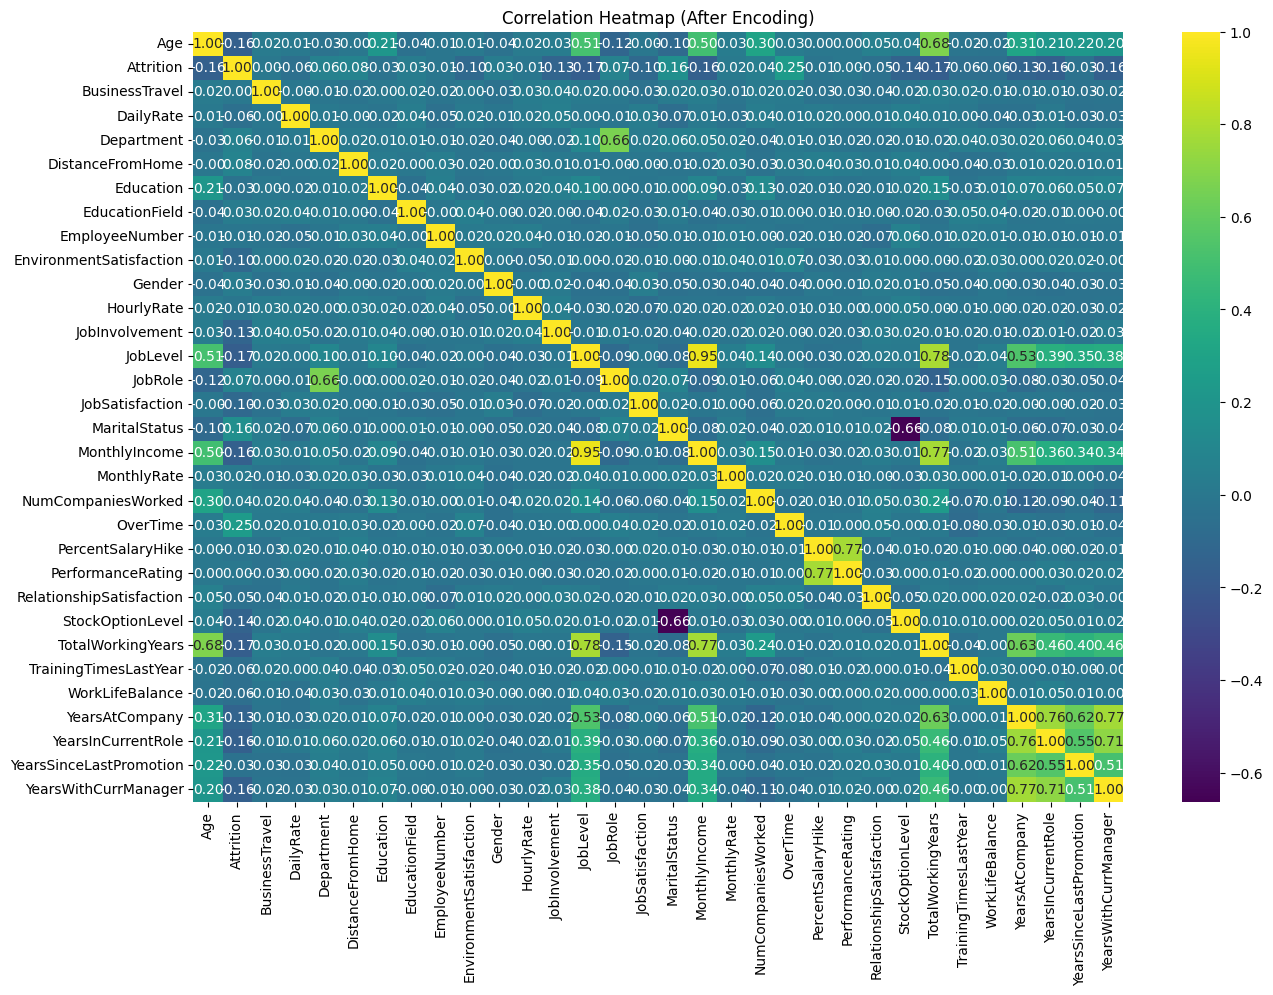

In [16]:
#Correlation Heatmap AFTER encoding

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap (After Encoding)')
plt.show()


In [17]:
#All the values in the dataset have changed into Numerical:
pd.options.display.max_columns=50
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [18]:
# Select features and target for Attrition prediction

X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Train shape: (1176, 30)
Test shape: (294, 30)
y_train shape: (1176,)
y_test shape: (294,)


In [19]:
#Scale numeric columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Logistic Regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))


Accuracy: 0.8945578231292517
Confusion Matrix:
 [[249   6]
 [ 25  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

AUC-ROC: 0.7712418300653595


In [21]:
#Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Accuracy: 0.8809523809523809
Confusion Matrix:
 [[254   1]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294

AUC-ROC: 0.734640522875817


In [22]:
# Cell 10: Save models as Pickle
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [23]:
#Example predictions

sample = X_test.iloc[:2]
sample_scaled = scaler.transform(sample)

print("Sample Attrition Predictions (Logistic):", lr.predict(sample_scaled))
print("Sample Attrition Predictions (RF):", rf.predict(sample))


Sample Attrition Predictions (Logistic): [0 0]
Sample Attrition Predictions (RF): [0 0]


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00


In [25]:
%%writefile attrition1_app.py
import streamlit as st
import pickle
import numpy as np

# Load models
lr = pickle.load(open('/content/logistic_model.pkl', 'rb'))
rf = pickle.load(open('/content/random_forest_model.pkl', 'rb'))
scaler = pickle.load(open('/content/scaler.pkl', 'rb'))

st.title("Employee Attrition Prediction")

# Input form for all 30 features

# Existing fields
age = st.number_input("Age", 18, 65, value=35)
monthly_income = st.number_input("Monthly Income", 1000, 20000, value=6500)
job_satisfaction = st.slider("Job Satisfaction", 1, 4, 3)
overtime = st.selectbox("OverTime", ['Yes', 'No'], index=1)

# Additional fields identified from scaler.feature_names_in_
business_travel = st.selectbox("Business Travel", ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], index=1)
daily_rate = st.number_input("Daily Rate", 100, 1500, value=800)
department = st.selectbox("Department", ['Sales', 'Research & Development', 'Human Resources'], index=1)
distance_from_home = st.number_input("Distance From Home", 1, 30, value=10)
education = st.slider("Education", 1, 5, 3)
education_field = st.selectbox("Education Field", ['Life Sciences', 'Medical', 'Marketing', 'Other', 'Technical Degree', 'Human Resources'], index=0)
environment_satisfaction = st.slider("Environment Satisfaction", 1, 4, 3)
gender = st.selectbox("Gender", ['Female', 'Male'], index=1)
hourly_rate = st.number_input("Hourly Rate", 30, 100, value=65)
job_involvement = st.slider("Job Involvement", 1, 4, 3)
job_level = st.slider("Job Level", 1, 5, 2)
job_role = st.selectbox("Job Role", ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'], index=1)
marital_status = st.selectbox("Marital Status", ['Single', 'Married', 'Divorced'], index=1)
monthly_rate = st.number_input("Monthly Rate", 2000, 27000, value=14000)
num_companies_worked = st.number_input("Num Companies Worked", 0, 9, value=2)
percent_salary_hike = st.slider("Percent Salary Hike", 11, 25, 15)
performance_rating = st.slider("Performance Rating", 1, 4, 3)
relationship_satisfaction = st.slider("Relationship Satisfaction", 1, 4, 3)
stock_option_level = st.slider("Stock Option Level", 0, 3, 1)
total_working_years = st.number_input("Total Working Years", 0, 40, value=10)
training_times_last_year = st.slider("Training Times Last Year", 0, 6, 2)
work_life_balance = st.slider("Work Life Balance", 1, 4, 3)
years_at_company = st.number_input("Years At Company", 0, 40, value=5)
years_in_current_role = st.number_input("Years In Current Role", 0, 40, value=3)
years_since_last_promotion = st.number_input("Years Since Last Promotion", 0, 15, value=1)
years_with_curr_manager = st.number_input("Years With Curr Manager", 0, 17, value=3)


# Create a dictionary to hold all feature values
feature_values = {
    'Age': age,
    'BusinessTravel': business_travel,
    'DailyRate': daily_rate,
    'Department': department,
    'DistanceFromHome': distance_from_home,
    'Education': education,
    'EducationField': education_field,
    'EnvironmentSatisfaction': environment_satisfaction,
    'Gender': gender,
    'HourlyRate': hourly_rate,
    'JobInvolvement': job_involvement,
    'JobLevel': job_level,
    'JobRole': job_role,
    'JobSatisfaction': job_satisfaction,
    'MaritalStatus': marital_status,
    'MonthlyIncome': monthly_income,
    'MonthlyRate': monthly_rate,
    'NumCompaniesWorked': num_companies_worked,
    'OverTime': overtime, # Keep as 'Yes'/'No' for now, convert later
    'PercentSalaryHike': percent_salary_hike,
    'PerformanceRating': performance_rating,
    'RelationshipSatisfaction': relationship_satisfaction,
    'StockOptionLevel': stock_option_level,
    'TotalWorkingYears': total_working_years,
    'TrainingTimesLastYear': training_times_last_year,
    'WorkLifeBalance': work_life_balance,
    'YearsAtCompany': years_at_company,
    'YearsInCurrentRole': years_in_current_role,
    'YearsSinceLastPromotion': years_since_last_promotion,
    'YearsWithCurrManager': years_with_curr_manager
}

# Reconstruct the feature array in the order the scaler expects, handling OHE
input_features = []
for expected_feature_name in scaler.feature_names_in_:
    # Handle OverTime separately as it's binary
    if expected_feature_name == 'OverTime':
        input_features.append(1 if feature_values['OverTime'] == 'Yes' else 0)
    # Handle numerical features
    elif expected_feature_name in feature_values and isinstance(feature_values[expected_feature_name], (int, float)):
         input_features.append(feature_values[expected_feature_name])
    # Handle one-hot encoded categorical features
    else:
        # Find the corresponding categorical feature name (e.g., 'BusinessTravel' from 'BusinessTravel_Travel_Rarely')
        categorical_feature_name = None
        for cat_feature in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']:
            if expected_feature_name.startswith(cat_feature + '_'):
                categorical_feature_name = cat_feature
                break

        if categorical_feature_name:
            # Get the selected value for this categorical feature
            selected_value = feature_values[categorical_feature_name]
            # Check if the expected feature name matches the selected category
            if expected_feature_name == f"{categorical_feature_name}_{selected_value}":
                input_features.append(1)
            else:
                input_features.append(0)
        else:
             # This case should ideally not happen if all expected features are covered
             # but include a safeguard.
             st.warning(f"Warning: Could not find a matching input for expected feature: {expected_feature_name}")
             input_features.append(0) # Append 0 or a default value


# Convert the list to a numpy array and reshape for the scaler
features_array = np.array(input_features).reshape(1, -1)


# Debugging: Print the shape of the input features and expected features
st.write(f"Shape of input features array: {features_array.shape}")
st.write(f"Expected number of features by scaler: {scaler.n_features_in_}")


features_scaled = scaler.transform(features_array)

if st.button("Predict Attrition (Logistic)"):
    result = lr.predict(features_scaled)
    st.write("Attrition Prediction (Logistic):", "Leave" if result[0] == 1 else "Stay")

if st.button("Predict Attrition (Random Forest)"):
    result_rf = rf.predict(features_scaled)
    st.write("Attrition Prediction (Random Forest):", "Leave" if result_rf[0] == 1 else "Stay")

Writing attrition1_app.py


In [26]:
!pip install streamlit pyngrok --quiet

In [27]:
!ngrok authtoken 2u8bzQfCvr5vlLyJvy0HCpQHUQ9_7H4DKQQBBGoPU8QbsaE7L

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [28]:
import os
import time
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit is running at: {public_url}")

!streamlit run attrition1_app.py --server.port 8501 --server.headless true &

time.sleep(3)

Streamlit is running at: NgrokTunnel: "https://7ac8940e0f28.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.83.15:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier wa

KeyboardInterrupt: 